In [69]:
import random

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

In [70]:
data = pd.read_csv("../data/csv/achmusik.csv")

data = data[data.columns[:-2]]
# Getting the decimals right -- commas to points and no more Nones
data = data.set_index(["genre", "sub_genre", "artist", "album", "song"])
data.fillna(value="", inplace=True)

for i in range(data.columns.size):
    data[data.columns[i]] = pd.to_numeric(data[data.columns[i]], errors='coerce')

data

Qu  \
genre   sub_genre artist                         album                             song                      
Reggae  NaN       10cc                           Bloody Tourists                   Dreadlock Holiday  7.25   
Rock    Soft Rock 10cc                           The Original Soundtrack           I'm Not In Love    4.50   
Hip-Hop Rap       1995                           La Source                         À chaque ligne     7.10   
                                                                                   Je brille          4.90   
                                                                                   La flemme          7.00   
...                                                                                                    ...   
Jazz    Gipsy     Rhythm Future Quartet          Rhythm Future Quartet and Friends Olli's Bossa       7.90   
Pop     NaN       Parcels                        Free                              Free               8.40   
Metal   NaN       Charred Walls of Of The Damned Creatures Watching over the Dead  The Soulless        NaN   
        Power     Persuader                      When Eden Burns                   Twisted Eyes        NaN   
Electro Pop       Jack Stauber                   Pop Food                          Buttercup          7.70   

                                                                                                       Gr  \
genre   sub_genre artist                         album                             song                     
Reggae  NaN       10cc                           Bloody Tourists                   Dreadlock Holiday  7.0   
Rock    Soft Rock 10cc                           The Original Soundtrack           I'm Not In Love    7.6   
Hip-Hop Rap       1995                           La Source                         À chaque ligne     NaN   
                                                                                   Je brille          NaN   
                                                                                   La flemme          NaN   
...                                                                                                   ...   
Jazz    Gipsy     Rhythm Future Quartet          Rhythm Future Quartet and Friends Olli's Bossa       NaN   
Pop     NaN       Parcels                        Free                              Free               NaN   
Metal   NaN       Charred Walls of Of The Damned Creatures Watching over the Dead  The Soulless       NaN   
        Power     Persuader                      When Eden Burns                   Twisted Eyes       NaN   
Electro Pop       Jack Stauber                   Pop Food                          Buttercup          NaN   

                                                                                                        Vi  \
genre   sub_genre artist                         album                             song                      
Reggae  NaN       10cc                           Bloody Tourists                   Dreadlock Holiday  7.00   
Rock    Soft Rock 10cc                           The Original Soundtrack           I'm Not In Love    6.00   
Hip-Hop Rap       1995                           La Source                         À chaque ligne     7.75   
                                                                                   Je brille          6.50   
                                                                                   La flemme          7.50   
...                                                                                                    ...   
Jazz    Gipsy     Rhythm Future Quartet          Rhythm Future Quartet and Friends Olli's Bossa        NaN   
Pop     NaN       Parcels                        Free                              Free                NaN   
Metal   NaN       Charred Walls of Of The Damned Creatures Watching over the Dead  The Soulless        NaN   
        Power     Persuader                  

In [87]:
qu_df = pd.DataFrame(columns=["mean", "ok"])
qu_df["ok"] = data["Ti"].dropna().groupby("genre").size() > 4
qu_df["mean"] = data["Ti"].dropna().groupby("genre").mean()

qu_df = qu_df[qu_df["ok"] == True].sort_values(by="mean", ascending=False)
for i in qu_df.head(5).index:
    print(i)
print("BOTTOM -------------------")
for i in qu_df.tail(5).index:
    print(i)

Acoustic
Funk
Metal
Electro
Jazz
BOTTOM -------------------
Pop
Hip-Hop
R&B
Acapella
Chanson


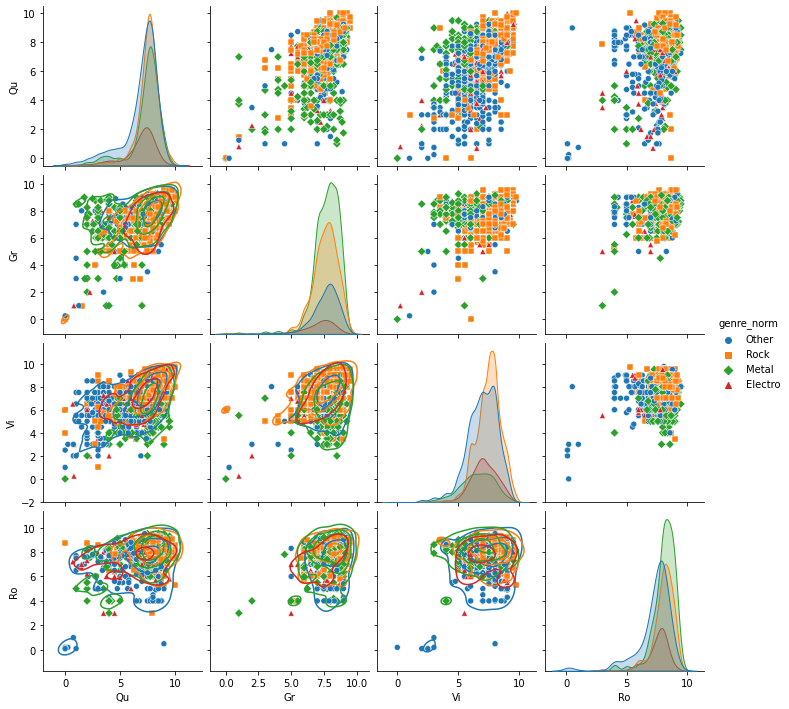

In [54]:
# Keep only top 5 genres in "normalized" genre
data["genre_norm"] = data.index.get_level_values(0)
top_genres = data["genre_norm"].value_counts().nlargest(3).index
data.loc[~data["genre_norm"].isin(top_genres), "genre_norm"] = "Other"

g = sns.pairplot(data.iloc[:, np.r_[0:4, 12]], hue="genre_norm", diag_kind="kde", markers=["o", "s", "D", "^"])
g.map_lower(sns.kdeplot, levels=4, color=".2")

In [111]:
genre_completion = (data.groupby(["genre"]).count().div(pd.Series(index=unique, data=counts), axis=0) * 100).astype(int)
genre_completion["count"] = counts
genre_completion.sort_values(by="count", ascending=False).drop("count", axis=1)

,Qu,Gr,Vi,Ro,Sa,Gl,Cl,Lu,Gë,Et,Ti,Be
genre,,,,,,,,,,,,
Rock,74,47,68,17,10,1,2,0,10,0,8,0
Metal,75,73,24,30,18,1,5,0,4,0,7,0
Electro,85,21,77,22,7,0,3,0,8,0,15,0
Hip-Hop,65,11,84,10,1,1,2,2,2,11,12,0
Pop,81,34,68,30,5,5,5,0,14,0,12,0
Jazz,100,4,77,11,10,1,0,0,3,0,7,0
Chanson,99,42,59,17,0,2,9,0,10,4,17,0
Funk,100,27,51,21,3,3,0,0,12,2,9,0
Reggae,100,0,42,71,0,0,60,0,0,0,5,0


In [96]:
unique, counts = np.unique(data.index.get_level_values(0), return_counts=True)

Acapella       41
Acoustic       37
Blues          44
Chanson       137
Classique      80
Country        31
Dance           9
Disco         107
Electro       569
Folk           64
Funk          129
Hip-Hop       480
Jazz          287
Metal        1634
Musical         3
Pop           347
R&B            93
Reggae        115
Rock         1851
dtype: int64